In [1]:
import saspy
sas = saspy.SASsession(cfgname='oda')

SAS Connection established. Subprocess id is 12240



In [2]:
cars = sas.sasdata('cars', 'sashelp')

In [3]:
stat = sas.sasstat()

In [4]:
methods = []
for i in stat.__dir__():
    if not i.startswith('_'):
        methods.append(i)

methods.sort()

print(f"{len(methods) = }")

import math

def print_dir_style(lst, num_columns):
    max_len = max(len(item) for item in lst)
    num_rows = math.ceil(len(lst) / num_columns)

    # Create a list of lists, where each sub-list is a column in the output
    columns = [lst[i : i + num_rows] for i in range(0, len(lst), num_rows)]

    # Pad each string in each column to the max length so they line up correctly
    for col in columns:
        for i in range(len(col)):
            col[i] = col[i].ljust(max_len)

    # Print each row
    for i in range(num_rows):
        for col in columns:
            if i < len(col):
                print(col[i], end=" ")
        print()

print_dir_style(methods, 5)

len(methods) = 15
factor     hpreg      logistic   phreg      sasproduct 
glm        hpsplit    mi         reg        tpspline   
hplogistic logger     mixed      sas        ttest      


### Let's run a regression which will return us a SASresults object that we can use to see any/all of the results

In [5]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [6]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

### Pick any one you want ...


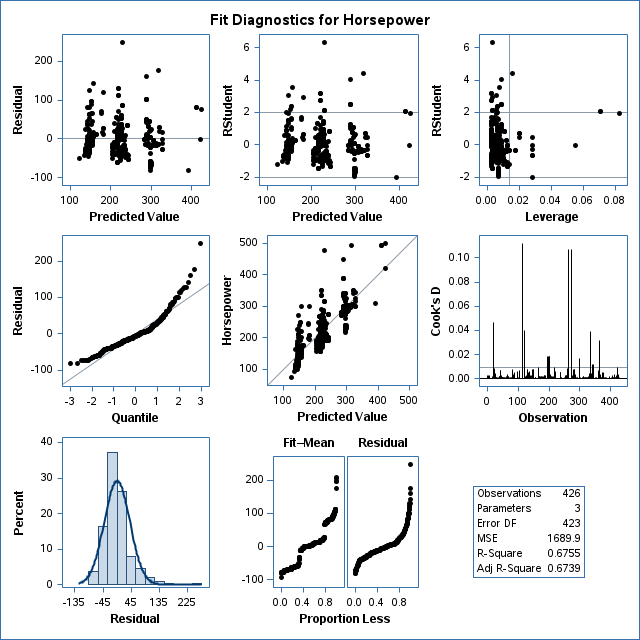

In [7]:
stat_results.DIAGNOSTICSPANEL

### Or display them ALL  (Click in the pannel to the Left of the results below to expand/shrink the result pane)

,Source,DF,SS,MS,FValue,ProbF
0,Model,2.0,1.487804e+06,743901.866012,440.192215,4.296828e-104
1,Error,423.0,7.148479e+05,1689.947803,NaN,NaN
2,Corrected Total,425.0,2.202652e+06,NaN,NaN,NaN



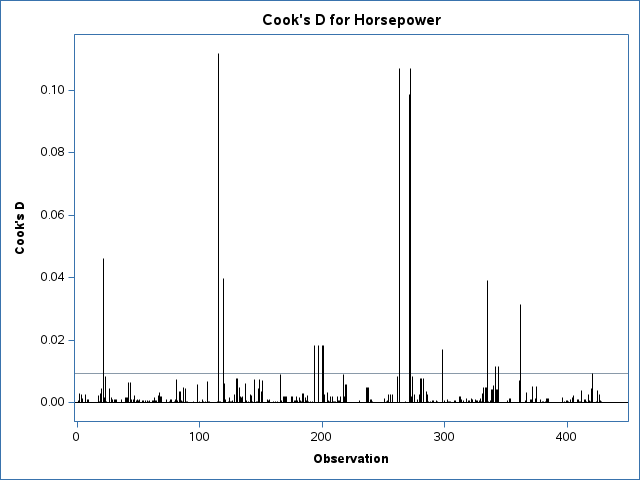


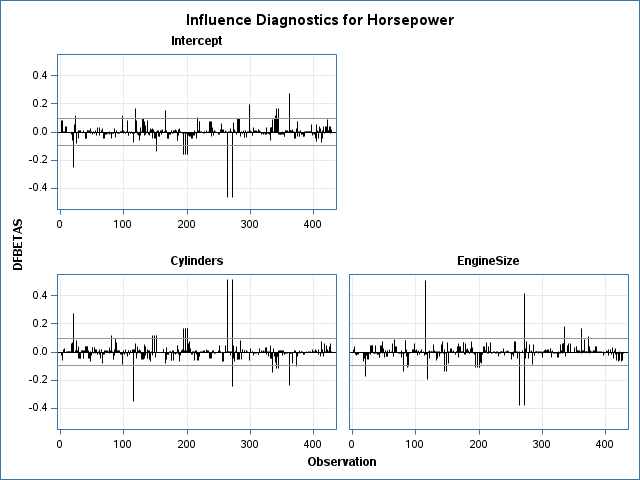


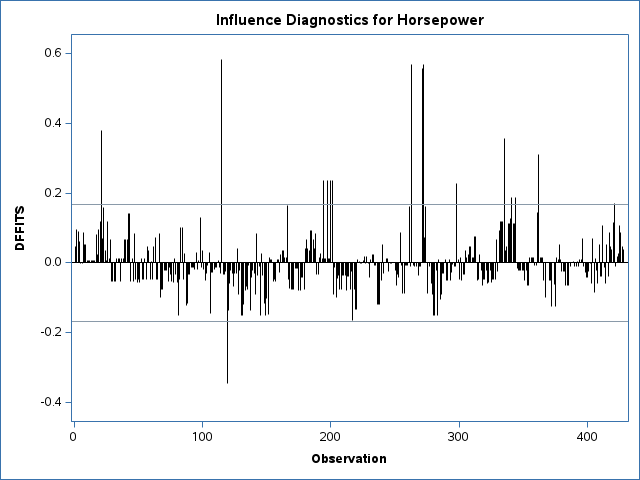


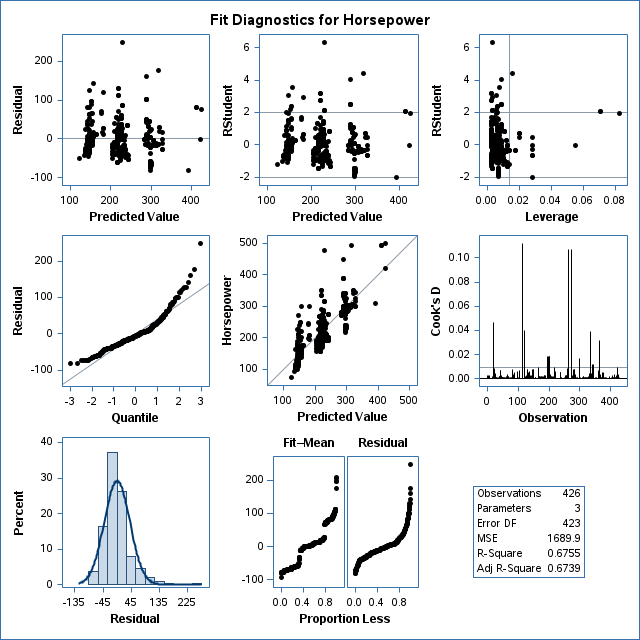

,Label1,cValue1,nValue1,Label2,cValue2,nValue2
0,Root MSE,41.10897,41.108975,R-Square,0.6755,0.675460
1,Dependent Mean,215.87793,215.877934,Adj R-Sq,0.6739,0.673926
2,Coeff Var,19.04269,19.042694,NaN,NaN,0.000000


,N,NObsRead,NObsUsed,SumFreqsRead,SumFreqsUsed,NObsMiss
0,428.0,428.0,426.0,428.0,426.0,2.0
1,426.0,428.0,426.0,428.0,426.0,2.0
2,2.0,428.0,426.0,428.0,426.0,2.0



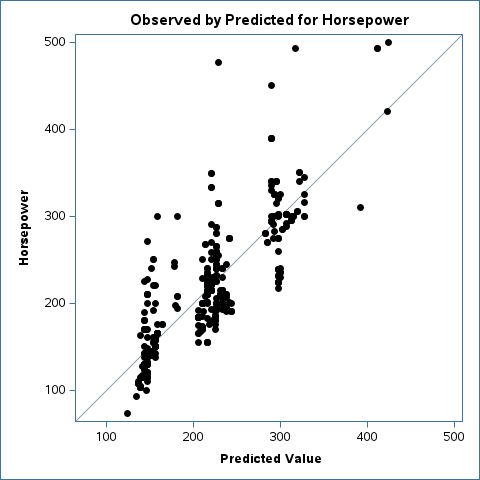

,Variable,DF,Estimate,StdErr,tValue,Probt,Label
0,Intercept,1.0,9.766817,8.023541,1.217270,2.241801e-01,Intercept
1,Cylinders,1.0,23.702956,3.054032,7.761202,6.382821e-14,NaN
2,EngineSize,1.0,21.354879,4.313046,4.951229,1.067389e-06,Engine Size (L)



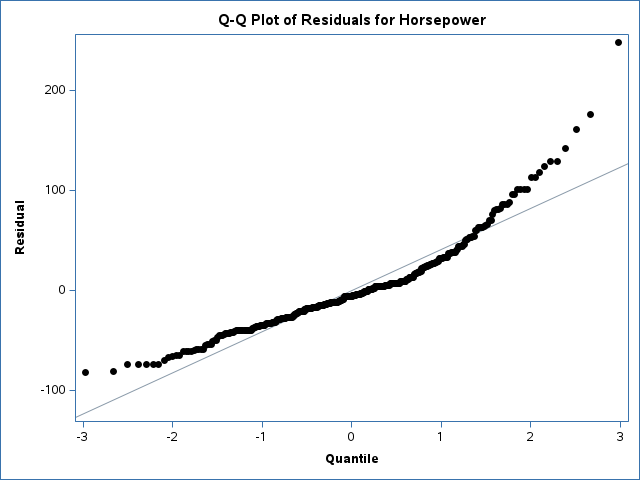


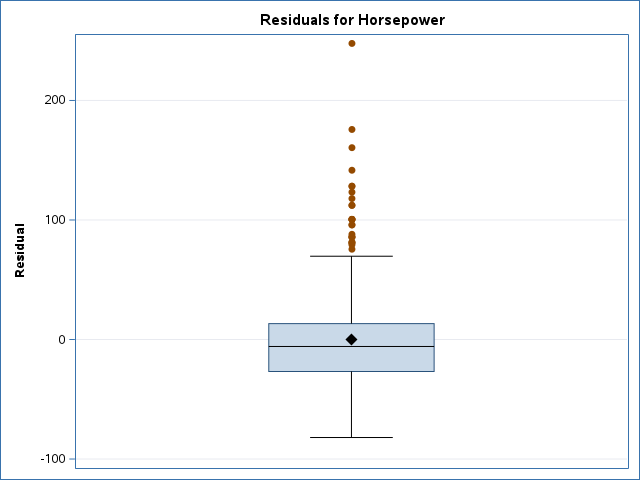


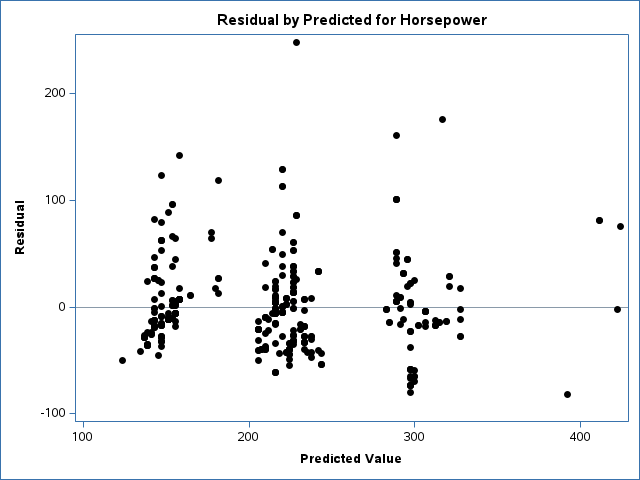


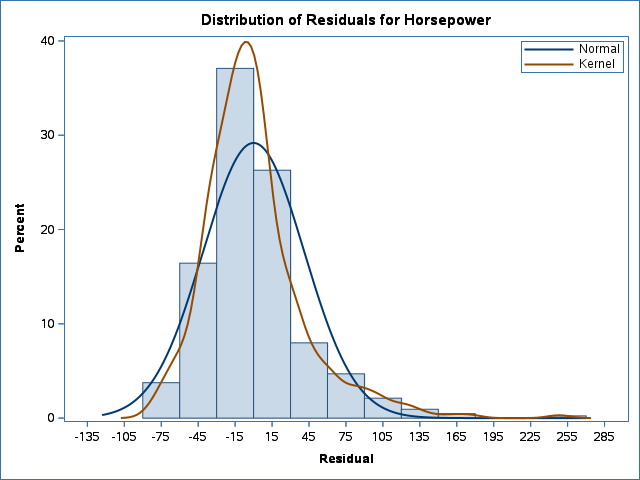


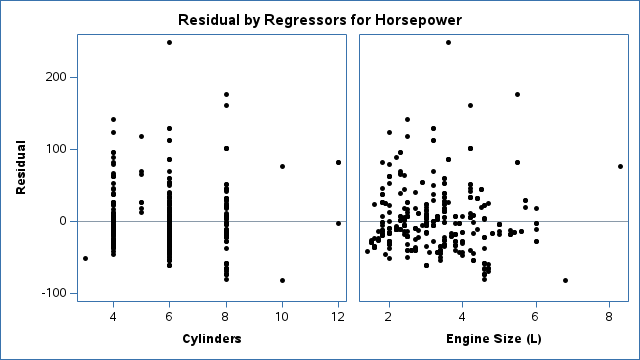


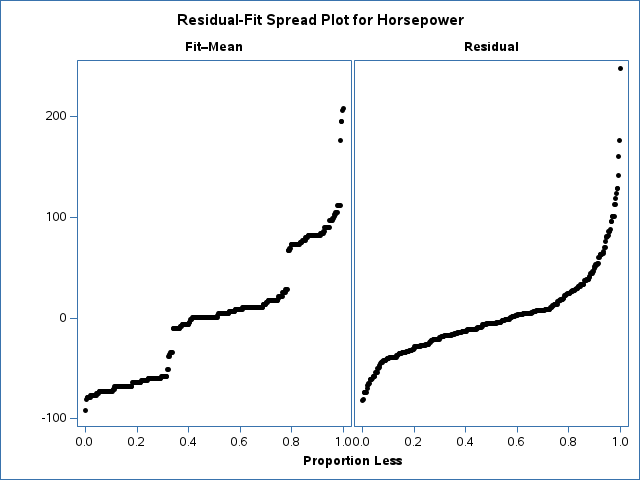


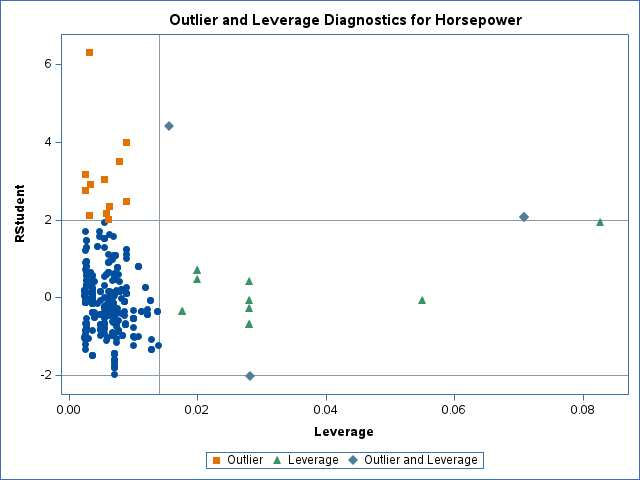


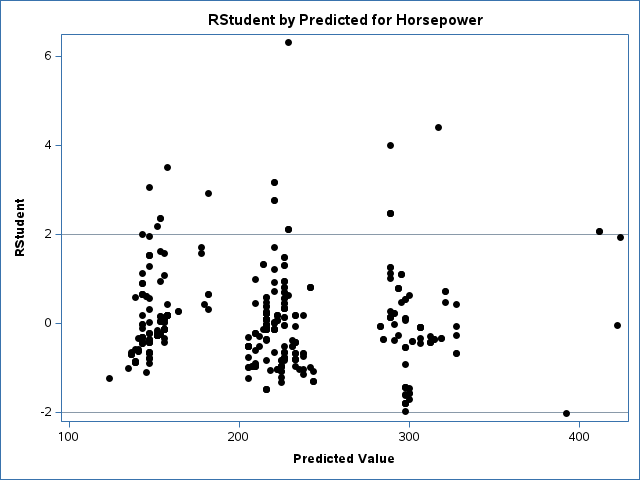

In [8]:
stat_results.ALL()